In [448]:
# 匯入 numpy 和 pandas 模組，numpy 是 python 的程式庫，支援維度陣列與矩陣運算。
# pandas 則提供檔案存取和數據操縱。
import numpy as np
import pandas as pd
# 從 keras.utils 匯入 to_categroical，因為後續要將 label 標籤 轉換成 one-hot encoding。
from tensorflow.keras.utils import to_categorical
# 設定 seed 可以讓每次產生隨機值時，都會有相同的輸出。(若使用GPU，則無法每次皆相同)
seed = 1234
np.random.seed(seed)

In [449]:
from tensorflow.keras.datasets import mnist,cifar10
(X_train_image, y_train_label),\
    (X_test_image, y_test_label) = mnist.load_data()

In [450]:
print('train data : ', len(X_train_image))
print('test data : ', len(X_test_image))

train data :  60000
test data :  10000


In [451]:
print('x_train_image : ', X_train_image.shape)
print('y_train_label : ', y_train_label.shape)

x_train_image :  (60000, 28, 28)
y_train_label :  (60000,)


In [452]:
import matplotlib.pyplot as plt
def plot_image(image):
    # 設定圖形顯示大小
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    # 使用 plt.imshow() 顯示圖像，傳入參數是 28 X 28 的圖形，
    # cmap 參數設定為 binary 以黑白灰階顯示
    plt.imshow(image, cmap = 'binary')
    # 開始繪圖
    plt.show()

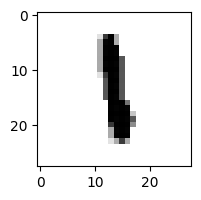

In [453]:
plot_image(X_train_image[200])

In [454]:
y_train_label[200]

np.uint8(1)

In [455]:
def plot_images_labels_prediction(images, labels, prediction,
                                    idx, num = 10):
    # 設定顯示圖形大小
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    # 如果顯示筆數大於25 則將他設定為25 以避免錯誤
    if num > 25: num = 25
    # 使用 for 迴圈依序畫出 num 個數字圖形
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i) # 建立 5 X 5 的 subgraph 子圖形
        ax.imshow(images[idx], cmap = 'binary') # 畫出 subgraph 子圖形
        title = "label=" + str(labels[idx]) # 設定子圖形 title 顯示標籤欄位
        if len(prediction) > 0: # 如果 prediction 有傳入值
            title += ",predict=" + str(prediction[idx]) # 將 prediction 加入 title
        ax.set_title(title, fontsize = 10) # 設定標題大小
        ax.set_xticks([]); ax.set_yticks([]) # 設定不顯示刻度
        idx += 1 # 讀取下一筆
    plt.show() # 開始畫圖

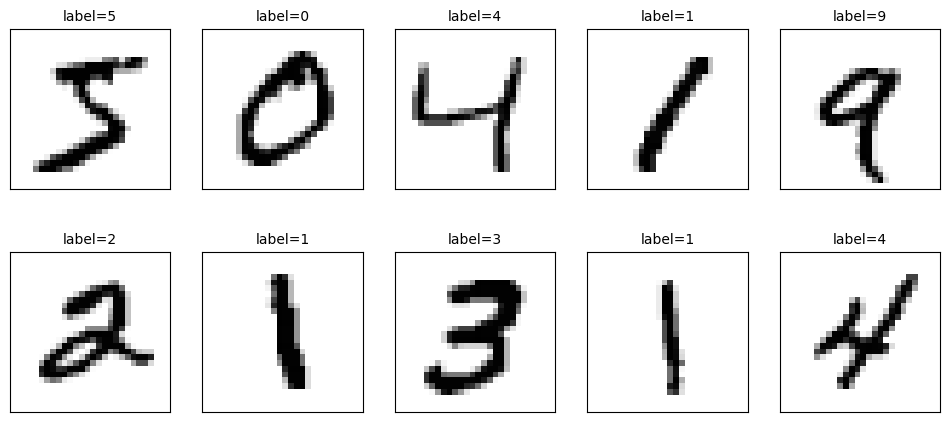

In [456]:
plot_images_labels_prediction(X_train_image, y_train_label, [], 0, 10)

In [457]:
print('x_test_image : ', X_test_image.shape)
print('y_test_label : ', y_test_label.shape)

x_test_image :  (10000, 28, 28)
y_test_label :  (10000,)


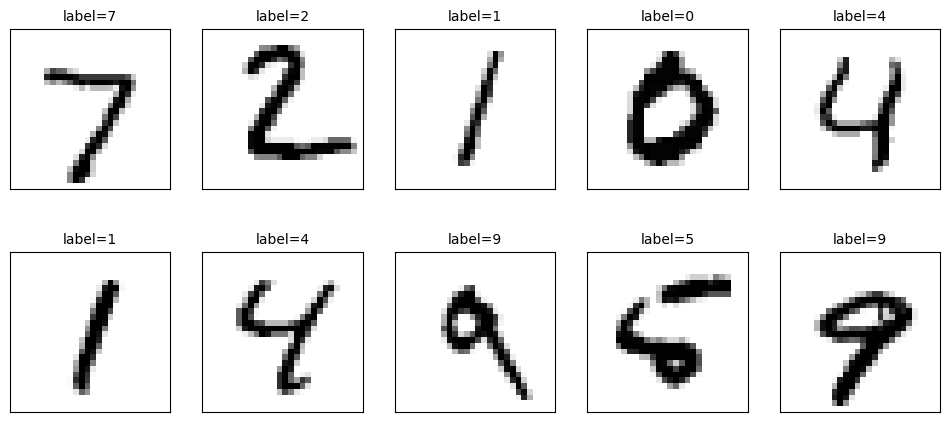

In [458]:
plot_images_labels_prediction(X_test_image, y_test_label, [], 0, 10)

In [459]:
X_Train = X_train_image.astype('float32')
X_Test = X_test_image.astype('float32')

In [460]:
print('x_train : ', X_Train.shape)
print('x_test : ', X_Test.shape)

x_train :  (60000, 28, 28)
x_test :  (10000, 28, 28)


In [461]:
X_Train_normalize = X_Train / 255
X_Test_normalize = X_Test / 255

In [462]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [463]:
y_TrainOneHot = to_categorical(y_train_label)
y_TestOneHot = to_categorical(y_test_label)

In [464]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [465]:
from tensorflow.keras import layers, metrics
from tensorflow.keras.layers import Dense,InputLayer,Flatten
from tensorflow.keras import models
import tensorflow as tf
tf.random.set_seed(seed)

In [466]:
model = models.Sequential()

In [467]:
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Flatten())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [468]:
model.add(Dense(32,  kernel_initializer = 'random_uniform',activation = 'sigmoid'))


In [469]:
model.add(Dense(10, kernel_initializer = 'normal', activation = 'softmax'))

In [470]:
print(model.summary())

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

None


In [471]:
loss_function = 'CategoricalCrossentropy'
optimize_function = 'sgd' # Adadelta , Adagrad ,Adam ,Adamax ,FTRL ,Nadam ,RMSprop ,sgd
model.compile(loss = loss_function, optimizer = optimize_function,metrics = ['accuracy'])

In [472]:
train_history = model.fit(x = X_Train_normalize, y = y_TrainOneHot,
                            validation_split = 0.2, epochs = 20, batch_size = 200,
                            verbose = 2)

Epoch 1/20
240/240 - 1s - 5ms/step - accuracy: 0.1115 - loss: 2.2985 - val_accuracy: 0.1115 - val_loss: 2.2872
Epoch 2/20
240/240 - 1s - 3ms/step - accuracy: 0.1190 - loss: 2.2769 - val_accuracy: 0.1210 - val_loss: 2.2658
Epoch 3/20
240/240 - 1s - 5ms/step - accuracy: 0.1759 - loss: 2.2522 - val_accuracy: 0.2406 - val_loss: 2.2358
Epoch 4/20
240/240 - 1s - 5ms/step - accuracy: 0.3256 - loss: 2.2164 - val_accuracy: 0.4148 - val_loss: 2.1918
Epoch 5/20
240/240 - 1s - 4ms/step - accuracy: 0.4801 - loss: 2.1642 - val_accuracy: 0.5357 - val_loss: 2.1289
Epoch 6/20
240/240 - 1s - 3ms/step - accuracy: 0.5523 - loss: 2.0916 - val_accuracy: 0.5807 - val_loss: 2.0439
Epoch 7/20
240/240 - 1s - 3ms/step - accuracy: 0.5814 - loss: 1.9972 - val_accuracy: 0.6029 - val_loss: 1.9378
Epoch 8/20
240/240 - 1s - 3ms/step - accuracy: 0.6002 - loss: 1.8848 - val_accuracy: 0.6221 - val_loss: 1.8168
Epoch 9/20
240/240 - 1s - 3ms/step - accuracy: 0.6196 - loss: 1.7624 - val_accuracy: 0.6420 - val_loss: 1.6902
E

In [473]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

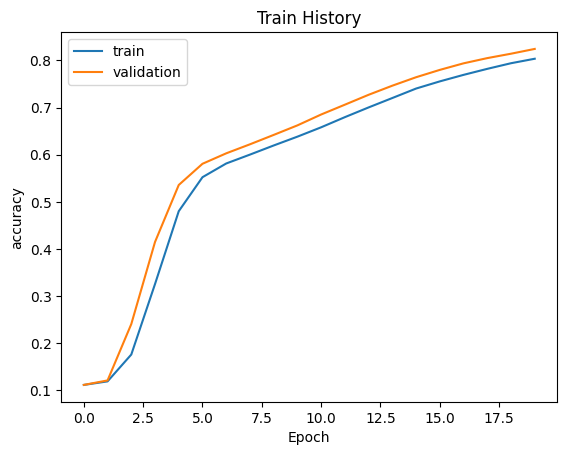

In [474]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

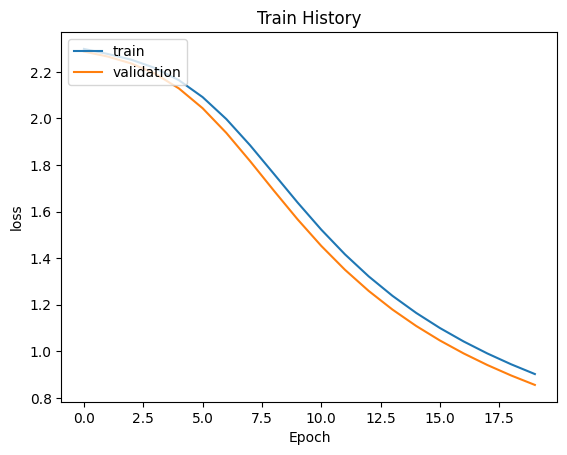

In [475]:
show_train_history(train_history, 'loss', 'val_loss')

In [476]:
scores = model.evaluate(X_Test_normalize, y_TestOneHot)
print()
print('accuracy = ', scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7895 - loss: 0.9105

accuracy =  0.8151000142097473


In [477]:
prediction = np.argmax(model.predict(X_Test), axis = -1)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 9, 5, 6])

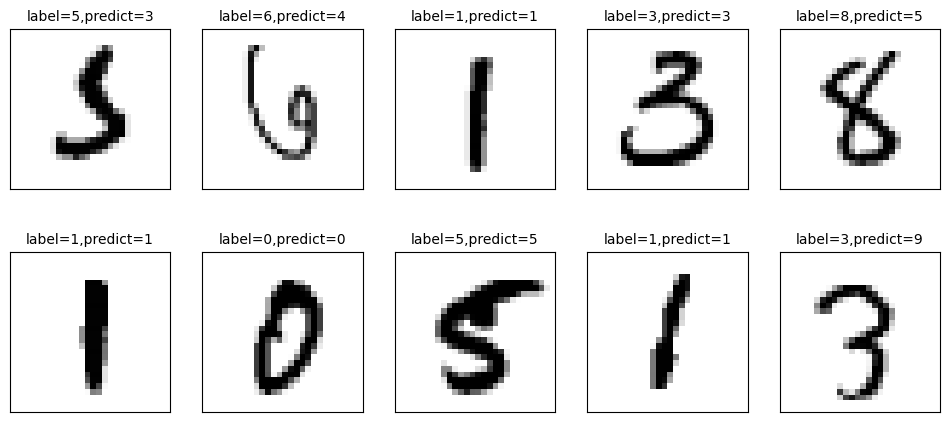

In [478]:
plot_images_labels_prediction(X_test_image, y_test_label, prediction, idx = 340)

In [479]:
y_test_label = y_test_label.reshape(10000)
#使用 pandas 中的 crosstab 能夠很方便的建立混淆矩陣。
pd.crosstab(y_test_label, prediction, rownames = ['label'], colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,962,0,3,2,0,2,8,1,2,0
1,0,1099,21,6,0,1,3,1,4,0
2,53,28,807,48,27,0,28,13,27,1
3,10,11,23,905,1,10,1,19,20,10
4,5,14,3,0,835,0,23,7,2,93
5,120,18,20,210,18,395,56,20,15,20
6,41,6,25,2,21,12,851,0,0,0
7,13,58,21,0,12,0,0,877,3,44
8,34,43,35,112,25,36,32,15,596,46


In [ ]:
# -----------------------------------------------------------
# Lab 13: 手寫數字辨識
# -----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageOps
from google.colab import files
import tensorflow as tf

def smart_preprocess(img_path):
    # 讀取圖片並轉灰階
    img = Image.open(img_path).convert('L')

    # 顏色反轉 (變成黑底白字)
    img = ImageOps.invert(img)

    # 自動對比度調整 (讓字更亮，背景更黑)
    img = ImageOps.autocontrast(img)

    # 轉為 numpy array 方便計算
    img_array = np.array(img)

    # 尋找數字的邊界 (Bounding Box)
    # 找出所有 "不是黑色" 的點 (設一個門檻，例如數值 > 50)
    coords = np.argwhere(img_array > 50)

    # 如果整張圖都是黑的(沒偵測到字)，就回傳原本的處理結果
    if coords.shape[0] == 0:
        print("警告：偵測不到筆跡，可能是字太細或門檻過高")
        return img.resize((28, 28)).convert('L')

    # 取得邊界
    y0, x0 = coords.min(axis=0)
    y1, x1 = coords.max(axis=0) + 1

    # 把數字切出來
    cropped = img.crop((x0, y0, x1, y1))

    # 調整大小並置中 (模擬 MNIST 格式)
    # 建立一個全新的 28x28 黑色畫布
    final_img = Image.new('L', (28, 28), 0)

    # 把切下來的數字縮放到最大邊長為 20 (留一點邊距，不要塞滿 28)
    w, h = cropped.size
    ratio = 20.0 / max(w, h)
    new_w, new_h = int(w * ratio), int(h * ratio)
    resized_digit = cropped.resize((new_w, new_h), Image.LANCZOS)

    # 貼到黑色畫布的正中間
    paste_x = (28 - new_w) // 2
    paste_y = (28 - new_h) // 2
    final_img.paste(resized_digit, (paste_x, paste_y))

    return final_img

# --- 主程式 ---
print("請上傳圖片 (建議：白紙黑字，字寫粗一點)")
uploaded = files.upload()

for fn in uploaded.keys():
    # 預處理
    processed_img = smart_preprocess(fn)

    # 資料正規化 (Normalization) 與 形狀調整 (Reshape)
    # 1. 將 0~255 的數值除以多少，縮放到 0~1 之間？
    # 2. 模型接受的輸入形狀是 (X, XX, XX, 1) ((Batch Size / 圖片數量), (Height / 高度), (Width / 寬度), (Channels / 顏色通道))
    # 請完成以下:
    img_array = np.array(processed_img).astype('float32') / 255
    model_input = img_array.reshape(1, 28, 28, 1)

    # 轉換為 Tensor
    model_input_tensor = tf.convert_to_tensor(model_input)

    # 預測
    probs = model(model_input_tensor)
    prediction = np.argmax(probs, axis=-1)

    # 顯示「模型眼中的圖片」與「預測結果」
    plt.figure(figsize=(4, 4))
    plt.imshow(img_array, cmap='gray') # 顯示灰階圖
    plt.title(f"AI Sees This -> Pred: {prediction[0]}", fontsize=14)
    plt.axis('off')
    plt.show()

    print(f"檔案 {fn} 預測結果: {prediction[0]}")
    print(f"信心分數: {probs.numpy()[0][prediction[0]]:.2f}")

請上傳圖片 (建議：白紙黑字，字寫粗一點)


In [ ]:
!sudo apt update
!sudo apt install tesseract-ocr tesseract-ocr-chi-tra

!pip install pytesseract

In [ ]:
import pytesseract
from PIL import Image
import cv2

# 開啟圖片
#image = Image.open("你的圖片名稱.png")

text = pytesseract.image_to_string(image, lang='chi_tra', config='--psm 10')

print("OCR 辨識結果:")
print("-" * 40)
print(text)